# Telecommunication Churn Prediction | Data Mining

> ### Objective of Project:
> Building a Churn Prediction Model for Telcommunication Companys: A Comparative Study of Classification Algorithms and Deep Learning Architectures

### Libraries and imports

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Exploring Dataset of Telecommunication Customers for Pattern finding

In [142]:
telecom = pd.read_csv("Telco-Customer-Churn.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [144]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


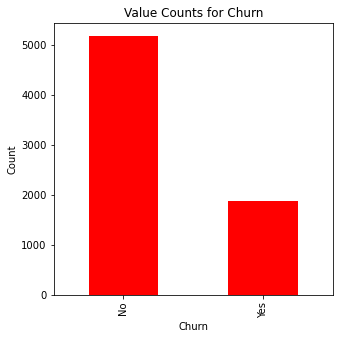

No     5174
Yes    1869
Name: Churn, dtype: int64


In [145]:
#Value Counts for categorical columns

value_counts_col = telecom['Churn'].value_counts()

plt.figure(figsize=(5, 5))
value_counts_col.plot(kind='bar', color='red')
plt.title(f"Value Counts for Churn")
plt.xlabel('Churn')
plt.ylabel("Count")

plt.show()
print(value_counts_col)

In [168]:
for col in telecom.columns:
    if telecom[col].dtype != 'int64' and telecom[col].dtype != 'float64':
        print(f'{col} : {telecom[col].unique()}')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [146]:
#Label Encoding
Encoded_data = telecom.copy()
Encoded_data.drop(['customerID','MonthlyCharges','TotalCharges'],axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder
label_Encoder = LabelEncoder()
Encoded_data = Encoded_data.apply(lambda x: label_Encoder.fit_transform(x))
Encoded_data[['tenure', 'MonthlyCharges', 'TotalCharges']] = telecom[['tenure', 'MonthlyCharges', 'TotalCharges']]
Encoded_data.head()

# telcom total charge replace('','0').astype(float)

Encoded_data.TotalCharges = Encoded_data.TotalCharges.replace(' ','0')
Encoded_data.TotalCharges = Encoded_data.TotalCharges.astype(float)




In [147]:
Encoded_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1,70.70,151.65


In [148]:
#missing values
print(telecom.isna().sum())
telecom = telecom.dropna()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [149]:
#encoding object columns
# object_columns = telecom.select_dtypes(include=["object"])
# encoded_object_columns = pd.get_dummies(object_columns)
# encoded_data = pd.concat([telecom.drop(columns=object_columns), encoded_object_columns], axis=1)

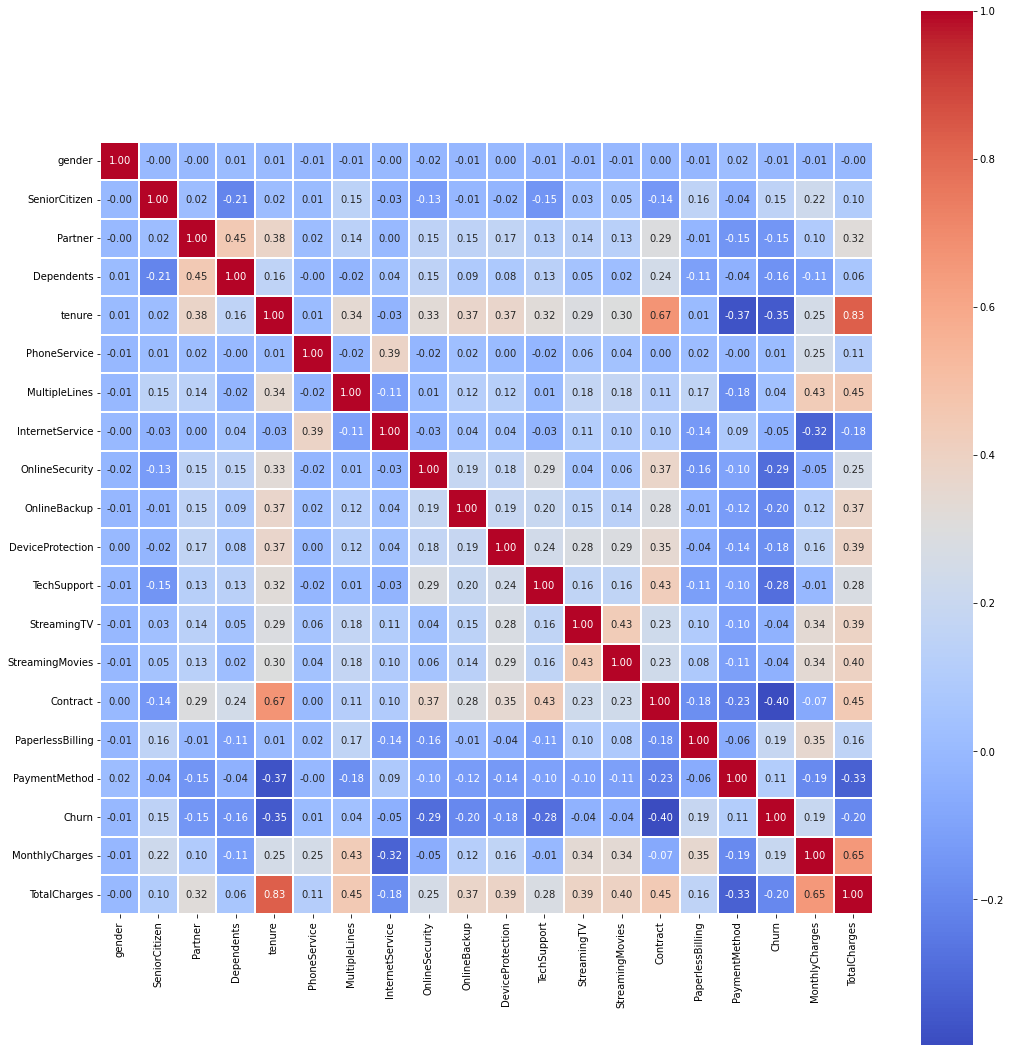

<Figure size 432x288 with 0 Axes>

In [150]:
#Correlation Matrix

corr_mat = Encoded_data.corr()

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat, annot=True , fmt = '.2f',linewidths=0.25, center= 0.3, cmap= 'coolwarm', square=True)
plt.tight_layout()
plt.show()
plt.clf()

In [151]:
telecom.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [152]:


def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
# int_columns = ["tenure","MonthlyCharges","TotalCharges"]

# for col in int_columns:
#     removed_outliers = removal_box_plot(telecom, col, 50)

In [153]:
# telco_numerical = telecom.select_dtypes(include=[int, float])
# f, ax = plt.subplots(1, 3, figsize=(12, 4))
# ax = ax.flatten()
# for i, col in enumerate(telco_numerical.columns):
#     sns.boxplot(data=telco_numerical, x=col, y=np.array([""]* len(telco_numerical)), ax=ax[i])

# plt.tight_layout()
# plt.show()
# plt.clf()

> # data vis left for now

### Class Imbalancing

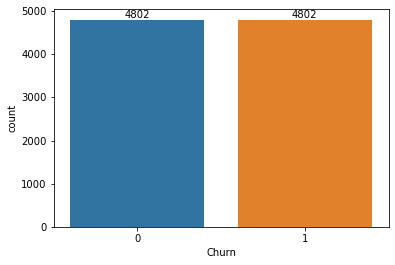

<Figure size 432x288 with 0 Axes>

In [154]:

y = Encoded_data['Churn']
X = Encoded_data.drop('Churn', axis=1)
# Resampling
resample = SMOTETomek(random_state=42)
X_res, y_res = resample.fit_resample(X, y)

ax = sns.countplot(x=y_res)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    stratify=telecom['Churn'],
                                                    random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 19), (2113, 19), (4930,), (2113,))

In [156]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.66666667, 0.61584454,
        0.04424397],
       [0.        , 1.        , 0.        , ..., 0.66666667, 0.68211261,
        0.025441  ],
       [0.        , 0.        , 1.        , ..., 0.33333333, 0.56552068,
        0.0249574 ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.90533134,
        0.88749309],
       [0.        , 0.        , 1.        , ..., 0.33333333, 0.01993024,
        0.05559138],
       [1.        , 0.        , 0.        , ..., 1.        , 0.02242152,
        0.01258521]])

Pair Plots¶
This allows us to view the distributions and relationships between numerical variables. From the histograms on the diagonal, there are a few observations that can be made:

Tenure - Non-Churned

Two peaks: Very low tenure and very high. We could investigate which demographics belong to these peaks (if any). I would predict that senior citizens are less likely to change service providers. We could also compare the types of packages to tenure length and see if there's any correlation.
Tenure - Churned

One Peak: Very clear trend that the shorter the tenure, the stronger the correlation to churning.
Monthly Charges - All Samples

Three modes: $35, \$50, $80. Likely similar to the default package prices available to customers with the most popular being the cheapest plan.
Total Charges - All Samples

Vast majority of customers have relatively low total charges. This makes sense as the total charge column is dependent on tenure and monthly charge.
There is a clear linear relationship between all variables with the exception of tenure vs MonthlyCharges.

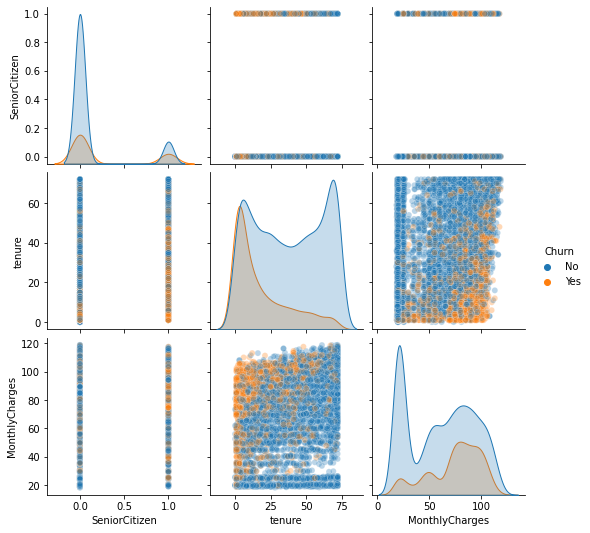

<Figure size 432x288 with 0 Axes>

In [157]:

numerics = telecom.select_dtypes(include=[int, float])
numerics["Churn"] = telecom["Churn"]

sns.pairplot(data=numerics, hue="Churn", plot_kws={'alpha': 0.3})
plt.show()
plt.clf()

We can more clearly see some of the relationships if we reduce the variation in possible monthly charges. We can see that for service plans cheaper than 35 dollars, the tenure and TotalCharges distributions have kept their shape but the MonthlyCharges values have fallen into more discrete modes with plans varying by roughly 5 dollars.

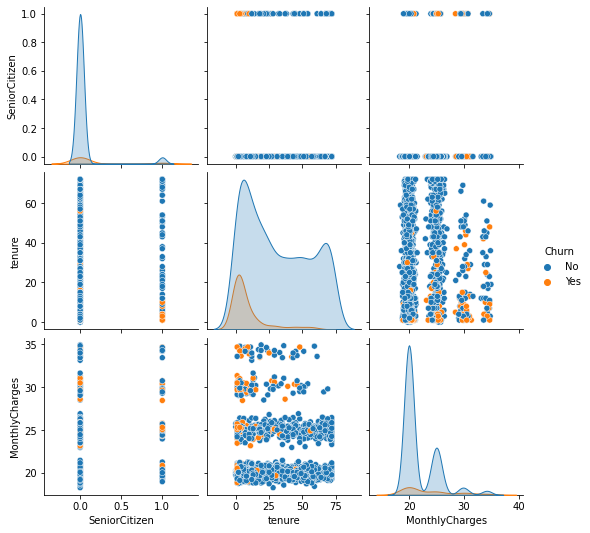

<Figure size 432x288 with 0 Axes>

In [158]:
telco_less_than_35 = numerics[numerics["MonthlyCharges"] < 35]

sns.pairplot(data=telco_less_than_35, hue="Churn")
plt.show()
plt.clf()

In [164]:
numeric = pd.DataFrame(data=Encoded_data,columns=["MonthlyCharges","TotalCharges","Churn"])
print("Summary Statistics of Non-Churned Customers")
print(numeric[numeric["Churn"] == False].describe())

print("\nSummary Statistics of Churned Customers")
print(numeric[numeric["Churn"] == True].describe())

Summary Statistics of Non-Churned Customers
       MonthlyCharges  TotalCharges   Churn
count     5174.000000   5174.000000  5174.0
mean        61.265124   2549.911442     0.0
std         31.092648   2329.954215     0.0
min         18.250000      0.000000     0.0
25%         25.100000    572.900000     0.0
50%         64.425000   1679.525000     0.0
75%         88.400000   4262.850000     0.0
max        118.750000   8672.450000     0.0

Summary Statistics of Churned Customers
       MonthlyCharges  TotalCharges   Churn
count     1869.000000   1869.000000  1869.0
mean        74.441332   1531.796094     1.0
std         24.666053   1890.822994     0.0
min         18.850000     18.850000     1.0
25%         56.150000    134.500000     1.0
50%         79.650000    703.550000     1.0
75%         94.200000   2331.300000     1.0
max        118.350000   8684.800000     1.0


In [166]:
Encoded_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1,70.70,151.65
